In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv(r'c:\\Users\\USER\\Downloads\data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB


***About The Data***

This data is made of U.S. crude oil imports from 2009 to 2024, including the country of origin, port of entry, refinery, grade of crude oil, and volume imported (in thousands of barrels). The dataset enables users to analyze patterns and trends in U.S. crude oil imports, such as identifying the primary sources of imported crude oil, the most common grades of crude oil imported, and the regional distribution of imports across U.S. ports and refineries.

In [3]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


***Data Cleaning***

In [4]:
df[['destination_Name','Destination_City','Destination_State','empty_value']]=df['destinationName'].str.split('/',expand=True)

In [5]:
df=df.drop(columns=['empty_value','Destination_State'])
df

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity,destination_Name,Destination_City
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61,EXXONMOBIL REFINING & SPLY CO,BEAUMONT
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62,FLINT HILLS RESOURCES LP,WEST
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10,SHELL OIL PRODUCTS US,ST ROSE
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381,OIL TANKING PL INC,HOUSTON (GULF)
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851,UNKNOWN PROCESSOR-TX,UNKNOWN PROCESSOR-TX
...,...,...,...,...,...,...,...,...,...,...
483048,2024,1,World,World,United States,United States,Heavy Sour,120942,United States,None
483049,2024,1,World,World,United States,United States,Heavy Sweet,8859,United States,None
483050,2024,1,World,World,United States,United States,Light Sour,7811,United States,None
483051,2024,1,World,World,United States,United States,Light Sweet,12553,United States,None


In [6]:
df.isnull().sum()

year                        0
month                       0
originName                  0
originTypeName              0
destinationName             0
destinationTypeName         0
gradeName                   0
quantity                    0
destination_Name            0
Destination_City       328595
dtype: int64

In [7]:
df=df.drop(columns=['destinationName'])

df

,year,month,originName,originTypeName,destinationTypeName,gradeName,quantity,destination_Name,Destination_City
0,2009,1,Belize,Country,Refinery,Light Sour,61,EXXONMOBIL REFINING & SPLY CO,BEAUMONT
1,2009,1,Belize,Country,Refinery,Light Sour,62,FLINT HILLS RESOURCES LP,WEST
2,2009,1,Algeria,Country,Refinery,Light Sweet,10,SHELL OIL PRODUCTS US,ST ROSE
3,2009,1,Algeria,Country,Refinery,Light Sweet,381,OIL TANKING PL INC,HOUSTON (GULF)
4,2009,1,Algeria,Country,Refinery,Light Sweet,851,UNKNOWN PROCESSOR-TX,UNKNOWN PROCESSOR-TX
...,...,...,...,...,...,...,...,...,...
483048,2024,1,World,World,United States,Heavy Sour,120942,United States,None
483049,2024,1,World,World,United States,Heavy Sweet,8859,United States,None
483050,2024,1,World,World,United States,Light Sour,7811,United States,None
483051,2024,1,World,World,United States,Light Sweet,12553,United States,None


In [8]:
df['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024], dtype=int64)

<Axes: >

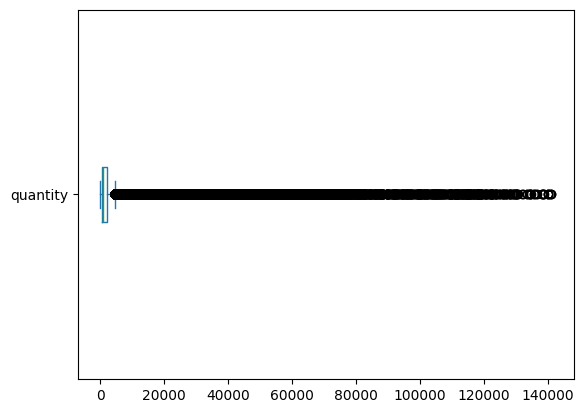

In [9]:
df['quantity'].plot.box(vert=False)

In [10]:
df['quantity'].describe()

count    483053.000000
mean       2425.239876
std        6367.700629
min           1.000000
25%         359.000000
50%         804.000000
75%        2008.000000
max      141016.000000
Name: quantity, dtype: float64

<Axes: title={'center': 'Origin types'}, ylabel='originTypeName'>

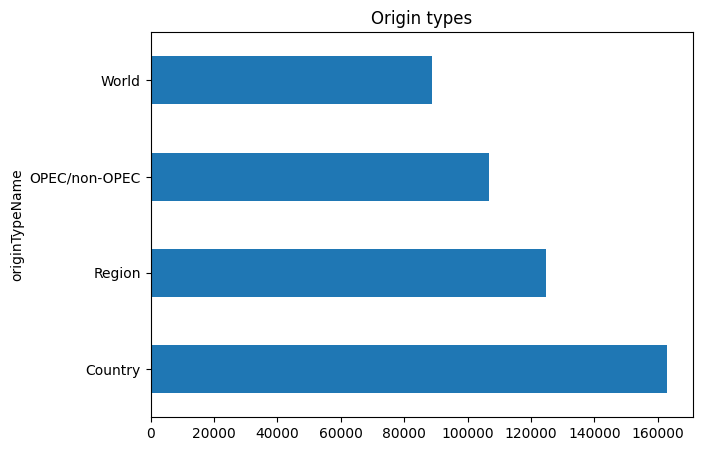

In [11]:
df['originTypeName'].value_counts().plot.barh(figsize=(7,5),title='Origin types')

Individual country and NON OPEC Countries are the major importation of crude oil in USA.

<Axes: title={'center': 'Top originName with most importation of Crude oil'}, ylabel='destinationTypeName'>

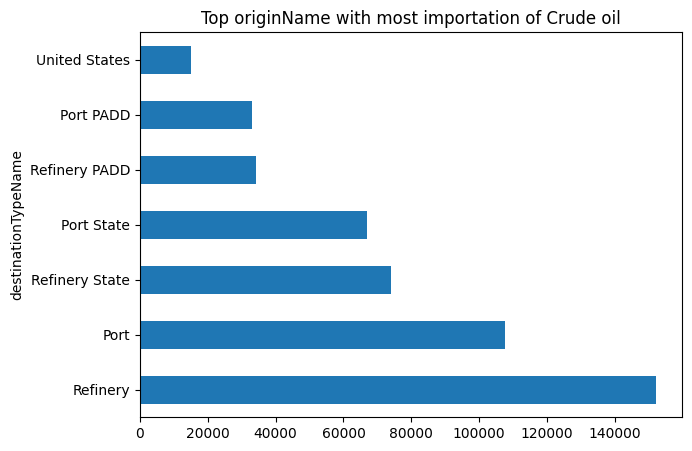

In [12]:
df['destinationTypeName'].value_counts()[:10].plot.barh(title="Top originName with most importation of Crude oil",figsize=(7,5))

In [13]:
df.head()

,year,month,originName,originTypeName,destinationTypeName,gradeName,quantity,destination_Name,Destination_City
0,2009,1,Belize,Country,Refinery,Light Sour,61,EXXONMOBIL REFINING & SPLY CO,BEAUMONT
1,2009,1,Belize,Country,Refinery,Light Sour,62,FLINT HILLS RESOURCES LP,WEST
2,2009,1,Algeria,Country,Refinery,Light Sweet,10,SHELL OIL PRODUCTS US,ST ROSE
3,2009,1,Algeria,Country,Refinery,Light Sweet,381,OIL TANKING PL INC,HOUSTON (GULF)
4,2009,1,Algeria,Country,Refinery,Light Sweet,851,UNKNOWN PROCESSOR-TX,UNKNOWN PROCESSOR-TX


In [14]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
df['year'].nunique()

16

<Axes: title={'center': 'Years by total Quantity of crude oil importation'}, ylabel='year'>

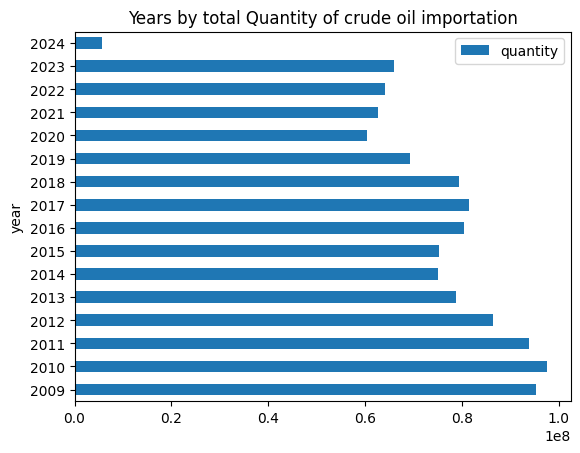

In [16]:
df[['year','quantity']].groupby('year').sum().plot.barh(title='Years by total Quantity of crude oil importation')

2024 was the lowest and these reason is base on 2024 haven't come to an end.



In [17]:
twenty_ten_df=df.query('year==2010')

twenty_ten_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
df['Months']=df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Noverber',12:'December'})

In [19]:
df[['Months','year','quantity']].groupby(by=['year','Months']).sum()

quantity
year Months             
2009 April       8006152
     August      7815108
     December    7437220
     February    7345492
     January     8883700
...                  ...
2023 May         5492200
     Noverber    5824504
     October     5313504
     September   5538400
2024 January     5751256

[181 rows x 1 columns]

<Axes: ylabel='Months'>

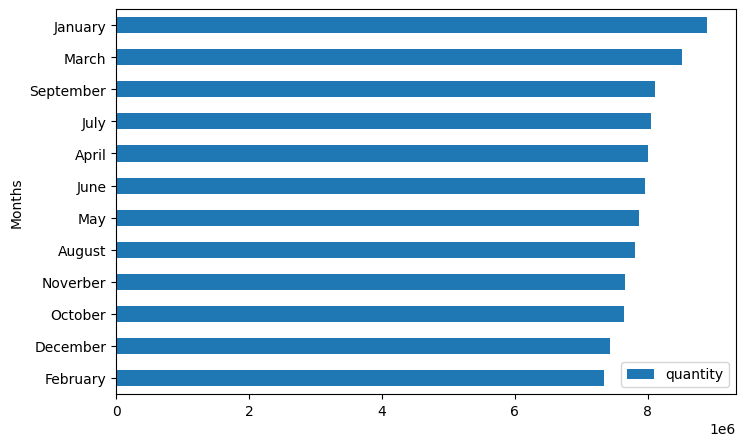

In [20]:
df09=df.query('year==2009')

df09[['Months','quantity']].groupby('Months').sum().sort_values(by=['quantity']).plot.barh(figsize=(8,5))


<Axes: ylabel='month'>

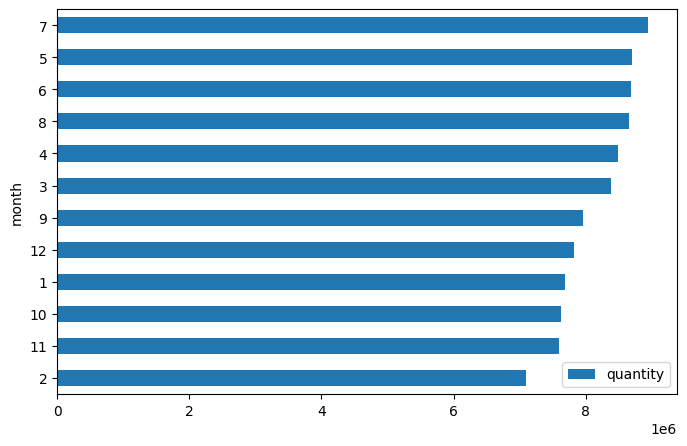

In [21]:
#2010
df10=df.query('year==2010')

df10[['month','quantity']].groupby('month').sum().sort_values(by=['quantity']).plot.barh(figsize=(8,5))


<Axes: ylabel='Months'>

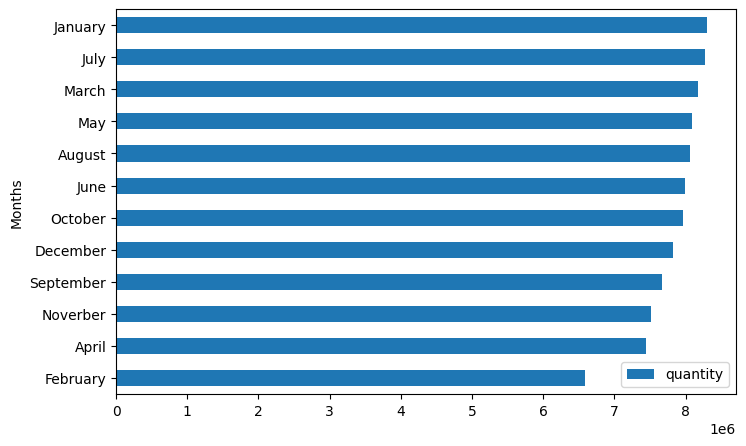

In [22]:
#2011

df11=df.query('year==2011')

df11[['Months','quantity']].groupby('Months').sum().sort_values(by=['quantity']).plot.barh(figsize=(8,5))

In [23]:
type(df['quantity'][0])

numpy.int64

Feburary is That Month in every Year that Happen to have lowest consumption of fuuel rate.

In [31]:
#which Export crude oil? to USA thew Most??

print('Big exportation')
df[['originName','quantity']].groupby('originName').sum().sort_values(by=['quantity'],ascending=False)[:10]


Big exportation


,quantity
originName,
World,292894791
Non-OPEC,198217089
Canada (Region),119406217
Canada,119406217
OPEC,94647819
Other Americas,81287318
Middle East,53983965
Saudi Arabia,33678442
Mexico,29971333


In [30]:
print('Lowest Countries by quantities Exportation to USA')
df[['originName','quantity']].groupby('originName').sum().sort_values(by=['quantity'],ascending=True)[:10]

Lowest Countries by quantities Exportation to USA


,quantity
originName,
Barbados,350
Spain,1358
South Africa,3619
Panama,4354
Papua New Guinea,4767
The Bahamas,7063
Italy,11011
Syria,11305
Tunisia,12985


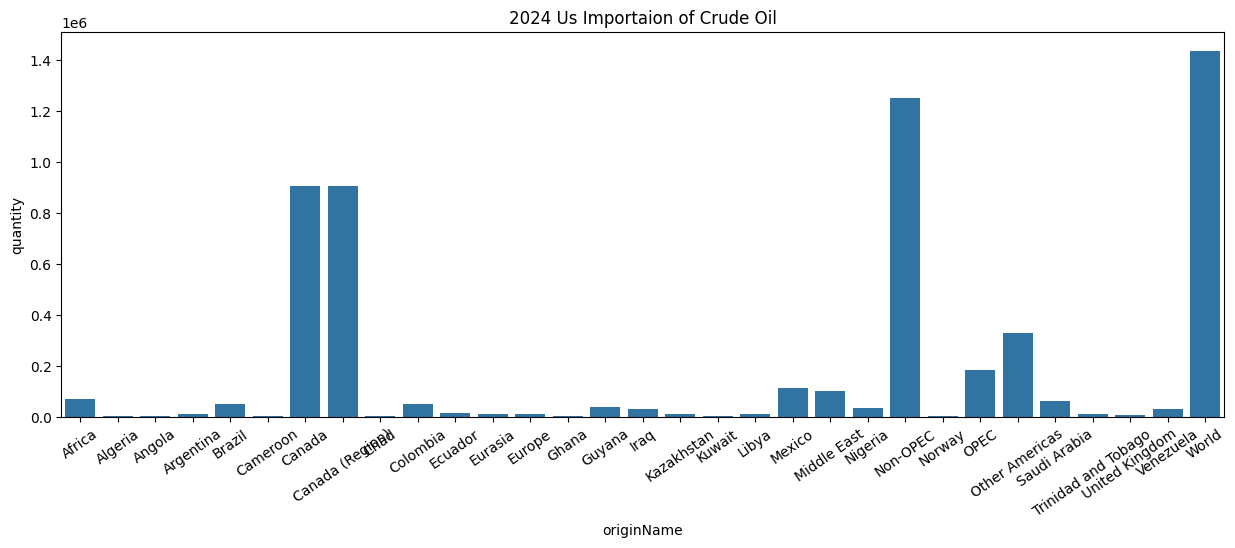

In [32]:
jan=df[(df['year'] == 2024) & (df['Months'] == 'January')]

january=jan[['originName','quantity']].groupby('originName').sum()


plt.figure(figsize=(15,5),dpi=100)
sns.barplot(data=january,x=january.index,y=january['quantity'])
plt.title('2024 Us Importaion of Crude Oil')
plt.xticks(rotation=35);

In [33]:
#manually Caculation

total_quantity = january.sum().sort_values()
country_percentages = january / total_quantity * 100

for country, percentage in country_percentages.items():
    print(f"{country}: {percentage}")

quantity: originName
Africa                  1.238060
Algeria                 0.065360
Angola                  0.064143
Argentina               0.220665
Brazil                  0.891179
Cameroon                0.078991
Canada                 15.787821
Canada (Region)        15.787821
Chad                    0.069741
Colombia                0.914426
Ecuador                 0.303673
Eurasia                 0.246103
Europe                  0.247685
Ghana                   0.108202
Guyana                  0.660047
Iraq                    0.567546
Kazakhstan              0.246103
Kuwait                  0.061221
Libya                   0.211293
Mexico                  1.965658
Middle East             1.752661
Nigeria                 0.640330
Non-OPEC               21.755996
Norway                  0.066090
OPEC                    3.244004
Other Americas          5.727671
Saudi Arabia            1.123894
Trinidad and Tobago     0.197661
United Kingdom          0.181595
Venezuela             

In [34]:
mask = (df['originName'] == 'Nigeria') & (df['year'].isin([2021, 2022]))
nig_data = df.loc[mask].copy()
nig_data['date'] = pd.to_datetime(nig_data['year'].astype(str) + '-' + nig_data['month'].astype(str))

In [35]:
date_range = pd.date_range(start='2021-01-01', end='2022-12-31', freq='MS')

monthly_imports = nig_data.groupby('date')['quantity'].sum()

monthly_imports = monthly_imports.reindex(date_range, fill_value=0)

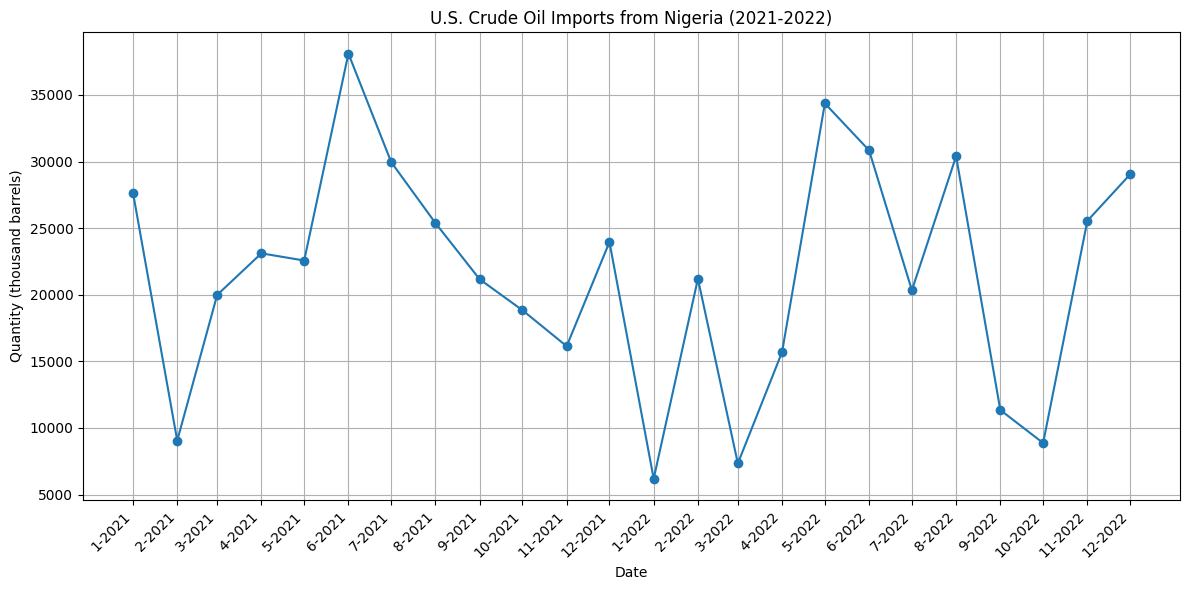

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_imports.index, monthly_imports.values, marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Quantity (thousand barrels)')
ax.set_title('U.S. Crude Oil Imports from Nigeria (2021-2022)')
ax.grid(True)

import calendar

months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_imports.index, [f"{month}-{year}" for year, month in zip(monthly_imports.index.year, 
                                                                            monthly_imports.index.month)], rotation=45, ha='right')

plt.tight_layout()

In the Month Of June(06) 2021 Nigeria witness witness more than 35000 crude oil exportation in two years.

**Destination by First Quater  in 2010**

In [37]:
mapping= (df['year'] == 2010) & (df['month'].isin([1, 2, 3]))
first_q1_2010= df.loc[mapping]

In [38]:
destination=first_q1_2010.groupby('destination_Name')['quantity'].sum().sort_values()

destiny=destination.tail(20)

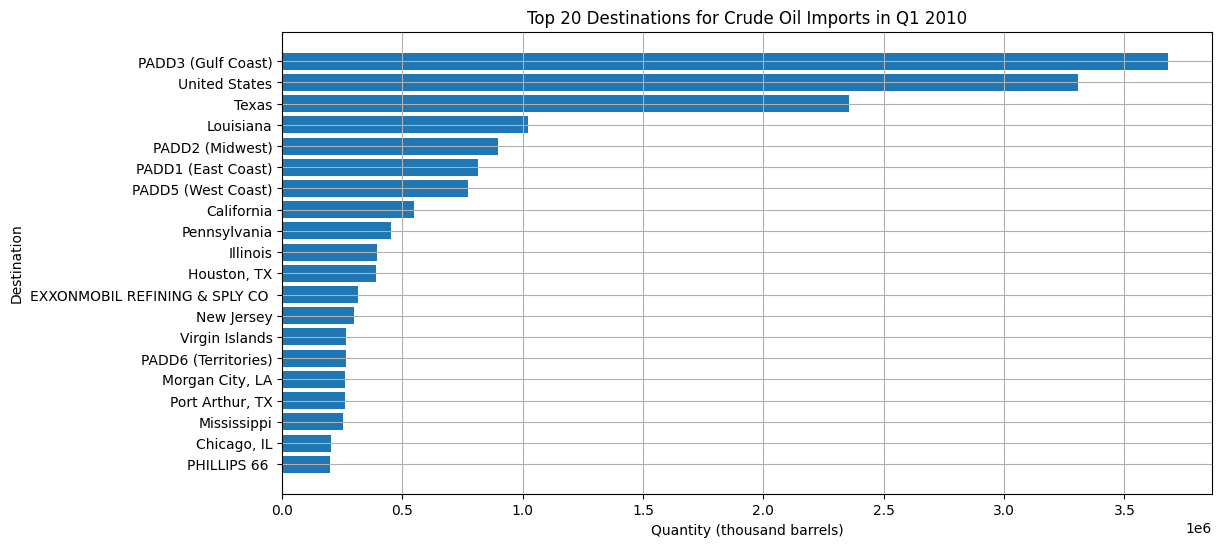

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(destiny.index, destiny.values)
ax.set_xlabel('Quantity (thousand barrels)')
ax.set_ylabel('Destination')
ax.set_title('Top 20 Destinations for Crude Oil Imports in Q1 2010')
ax.grid(True)

**Destination by LAst Quater  in 2010**

In [40]:
mapp= (df['year'] == 2010) & (df['month'].isin([10, 11, 12]))
last_q1_2010= df.loc[mapp]

destinationn=last_q1_2010.groupby('destination_Name')['quantity'].sum().sort_values()

destinyy=destinationn.tail(20)

Text(0.5, 1.0, 'Top 20 Destinations for Crude Oil Imports in Q4 2010')

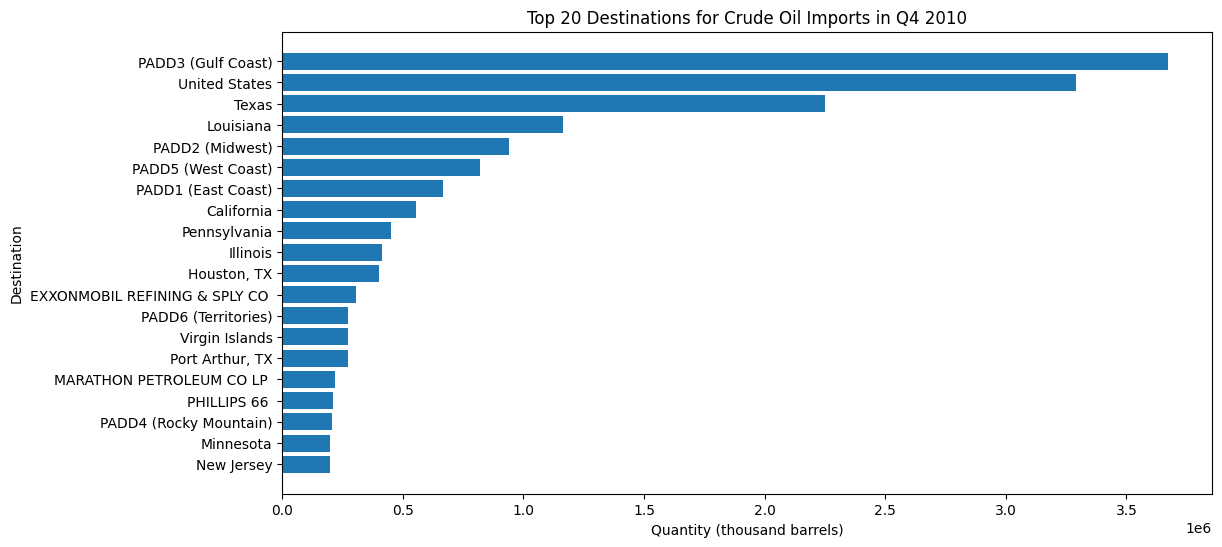

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(destinyy.index, destinyy.values)
ax.set_xlabel('Quantity (thousand barrels)')
ax.set_ylabel('Destination')
ax.set_title('Top 20 Destinations for Crude Oil Imports in Q4 2010')

The Big TOp Five Receiver of Crude oil in the State till maintain Their championship Except for the LOW REFINERies values,
there is volatal.